#Understanding Dataset

##Task1 : Loading dataset and exploring the structure

In [1]:
#1) Understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ccfd_data = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection.csv')
print(ccfd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default(y)             100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

###Task2 : Check the types of variables

In [2]:

ccfd_data.head()

,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009


###Task 3: Identifying the types of variables, duplicates and outliers


Duplicated data: 0
Outliers in numerical features:
The outliers in feature 'age' shown in the boxplot as: 


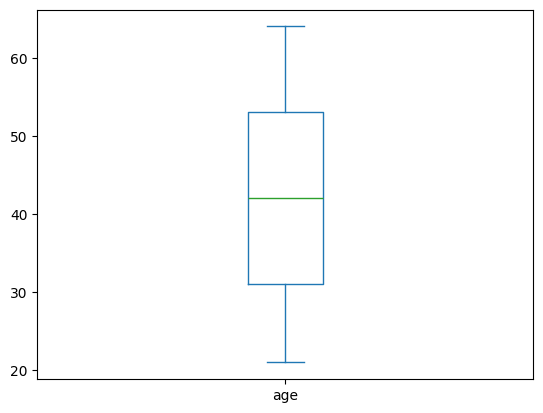

The outliers in feature 'income' shown in the boxplot as: 


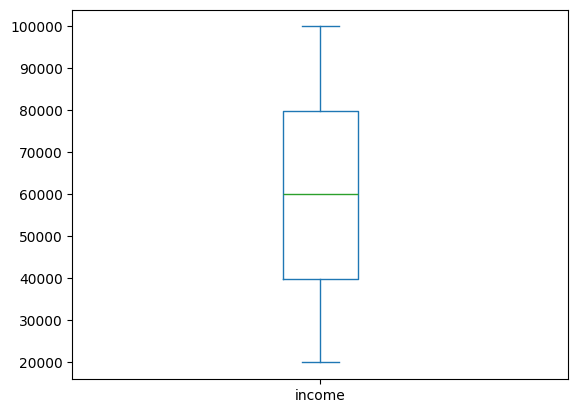

The outliers in feature 'loan_amount' shown in the boxplot as: 


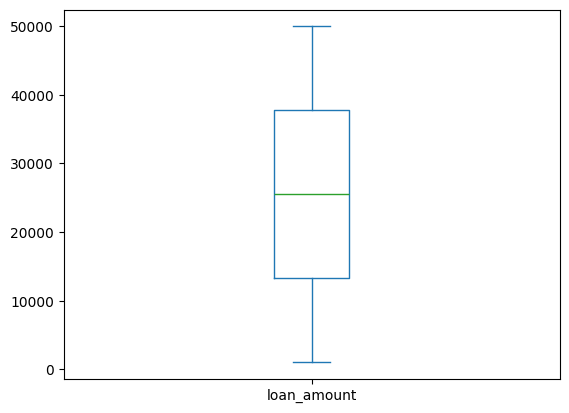

The outliers in feature 'credit_score' shown in the boxplot as: 


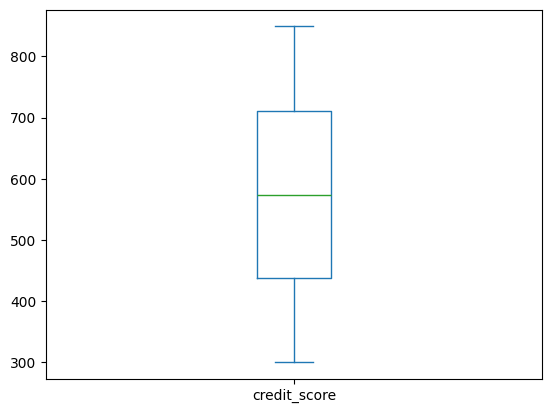

The outliers in feature 'loan_term' shown in the boxplot as: 


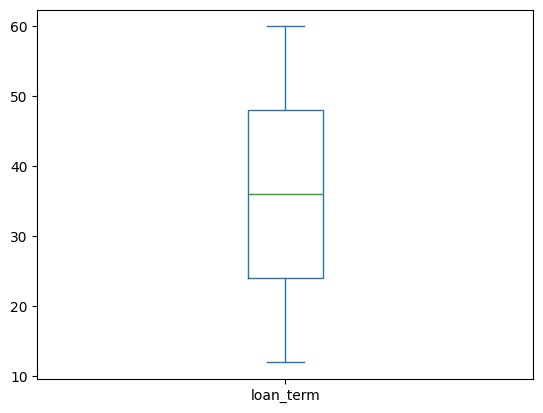

The outliers in feature 'interest_rate' shown in the boxplot as: 


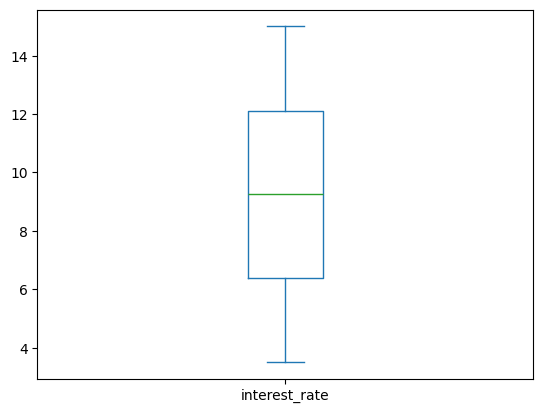

The outliers in feature 'debt_to_income_ratio' shown in the boxplot as: 


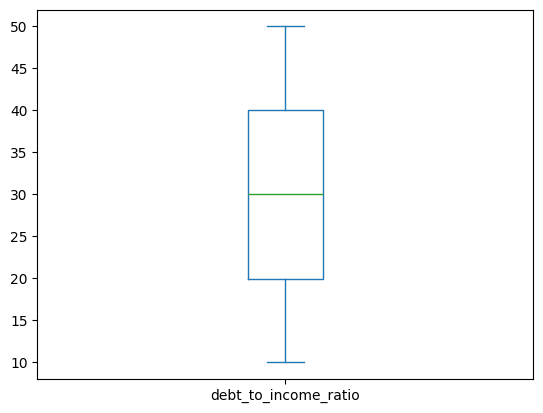

The outliers in feature 'num_of_dependents' shown in the boxplot as: 


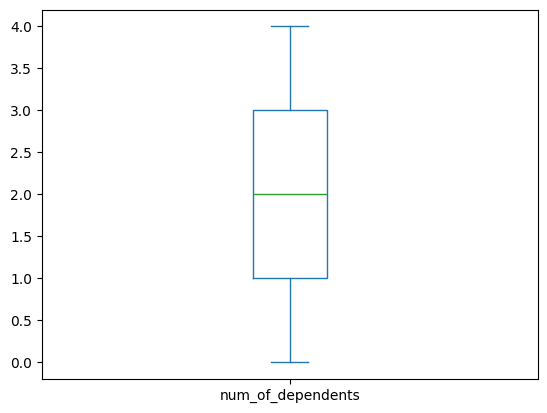

The outliers in feature 'credit_history_length' shown in the boxplot as: 


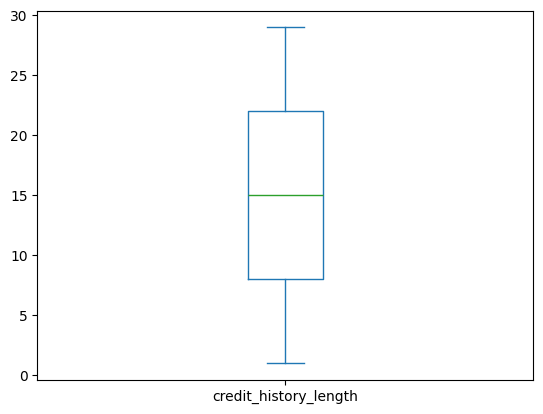

The outliers in feature 'num_credit_lines' shown in the boxplot as: 


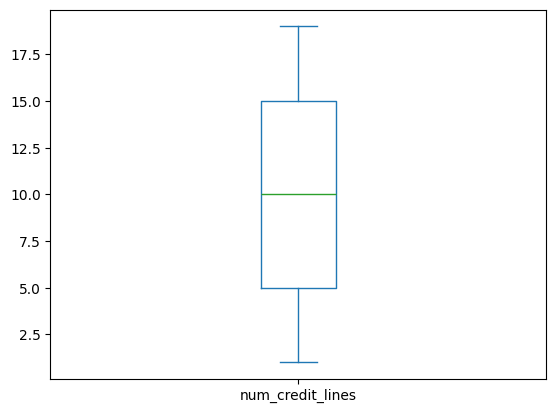

The outliers in feature 'late_payments' shown in the boxplot as: 


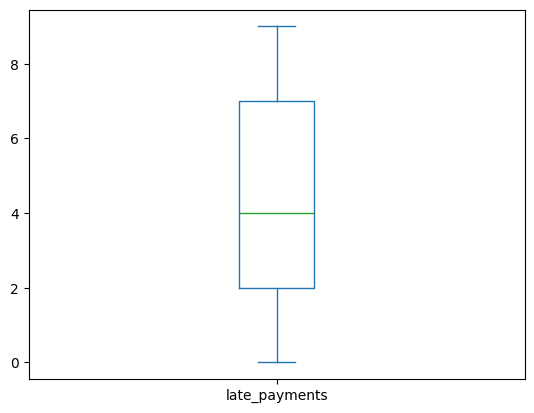

The outliers in feature 'bankruptcies' shown in the boxplot as: 


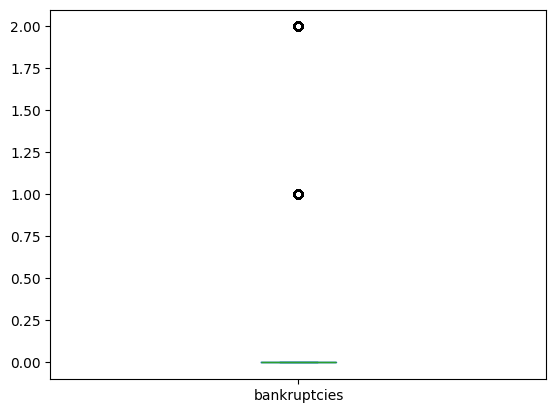

The outliers in feature 'annual_savings' shown in the boxplot as: 


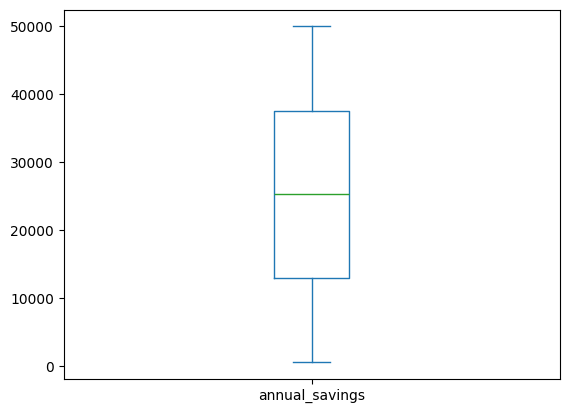

The outliers in feature 'retirement_savings' shown in the boxplot as: 


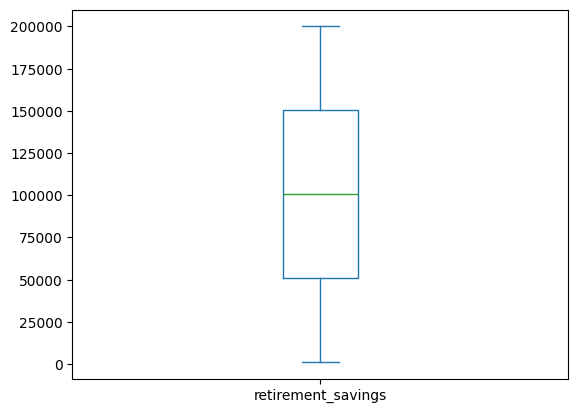

The outliers in feature 'monthly_expenses' shown in the boxplot as: 


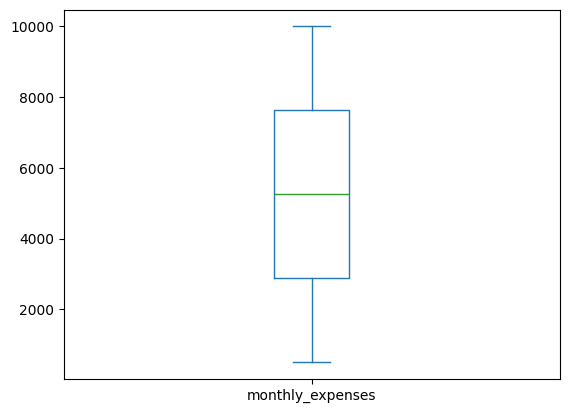

The outliers in feature 'default' shown in the boxplot as: 


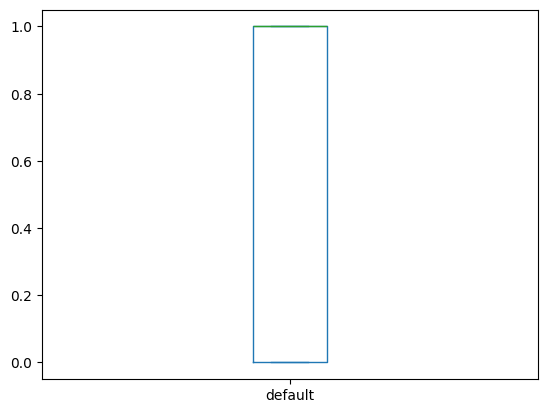

In [3]:
#Renaming the column 'default(y)' to 'default'
ccfd_data.rename(columns={'default(y)':'default'},inplace=True)

#grouping variables as categorical and numerical.
#Within numerical features, true_numeric_features are continuous and numeric_to_encode are discrete
categorical_features = ['employment_status','home_ownership','marital_status','education_level']
numerical_features  = ['age', 'income', 'loan_amount', 'credit_score','loan_term', 'interest_rate', 'debt_to_income_ratio',
       'num_of_dependents', 'credit_history_length', 'num_credit_lines',
       'late_payments', 'bankruptcies', 'annual_savings', 'retirement_savings',
       'monthly_expenses','default']
true_numeric_features = ['age', 'income', 'loan_amount', 'credit_score','loan_term', 'interest_rate', 'debt_to_income_ratio',
        'bankruptcies', 'annual_savings', 'retirement_savings',
       'monthly_expenses']
numeric_to_encode = ['num_of_dependents', 'credit_history_length', 'num_credit_lines',
       'late_payments',]

print("Duplicated data:",ccfd_data.duplicated().sum())
print("Outliers in numerical features:")

for feature in numerical_features:
  print("The outliers in feature '{0}' shown in the boxplot as: ".format(feature))
  ccfd_data[feature].plot(kind='box')
  plt.show()



In [4]:
#Analyzing the values in numeric_to_encode group
print("the value counts of features in numeric_to_encode are: ")
for feature in numeric_to_encode:
  print("the value counts of feature {0}".format(feature))
  print(ccfd_data[feature].value_counts()/len(ccfd_data)*100)

the value counts of features in numeric_to_encode are: 
the value counts of feature num_of_dependents
num_of_dependents
0    20.142
4    20.109
1    20.073
3    19.874
2    19.802
Name: count, dtype: float64
the value counts of feature credit_history_length
credit_history_length
2     3.599
14    3.552
17    3.532
6     3.511
26    3.501
11    3.494
13    3.489
12    3.476
3     3.461
8     3.451
19    3.451
27    3.449
21    3.444
24    3.443
18    3.441
15    3.439
1     3.435
4     3.431
28    3.430
29    3.427
5     3.424
25    3.424
22    3.422
16    3.421
9     3.397
10    3.391
23    3.389
7     3.339
20    3.337
Name: count, dtype: float64
the value counts of feature num_credit_lines
num_credit_lines
9     5.413
18    5.379
7     5.333
10    5.321
2     5.319
13    5.282
17    5.279
11    5.275
14    5.274
6     5.264
3     5.254
12    5.247
15    5.239
16    5.214
1     5.203
19    5.201
5     5.189
8     5.184
4     5.130
Name: count, dtype: float64
the value counts of featur

###Task 4: Analyzing class imbalance

In [5]:
ccfd_copy1 = ccfd_data.copy()
#Taking a copy of dataset and procceeding with the EDA using this copy.

ccfd_copy1['default'].value_counts()
twice_non_default = ccfd_copy1['default'].value_counts()[0]*2
default_count = ccfd_copy1['default'].value_counts()[1]
balanced = twice_non_default > default_count
if (balanced):
  print("The dataset is balanced")
else:
  print("The dataset is not balanced")

The dataset is balanced


In [6]:
#checking for missing values
ccfd_copy1.isnull().sum()

,0
age,0
income,0
loan_amount,0
credit_score,0
employment_status,0
default,0
loan_term,0
interest_rate,0
debt_to_income_ratio,0
num_of_dependents,0


In [7]:
# checking for inconsistences

#numerical features
#numerical_features  = ['age', 'income', 'loan_amount', 'credit_score','loan_term', 'interest_rate', 'debt_to_income_ratio',
#       'num_of_dependents', 'credit_history_length', 'num_credit_lines',
#       'late_payments', 'bankruptcies', 'annual_savings', 'retirement_savings',
#       'monthly_expenses']

#features to check for negative values
neg_value_check_features = ['income', 'credit_score','loan_term', 'interest_rate', 'debt_to_income_ratio',
       'num_of_dependents', 'credit_history_length', 'num_credit_lines',
       'late_payments', 'bankruptcies', 'annual_savings', 'retirement_savings',
       'monthly_expenses']


for neg_features in neg_value_check_features:
  neg_value_check = np.where(ccfd_copy1[neg_features]<0)
  print("the number of inconsistencies in {0} feature is {1}".format(neg_features,len(neg_value_check[0])))
#1)Age should be greater than 16
age_check = np.where((ccfd_copy1['age']<16) | (ccfd_copy1['age']>100))
print("the number of inconsistencies in age_feature is {0}".format(len(age_check[0])))

#2)Loan amount should be greater than 0
loan_amount_check = np.where(ccfd_copy1['loan_amount']<=0)
print("the number of inconsistencies in loan_amount_feature is {0}".format(len(loan_amount_check[0])))


the number of inconsistencies in income feature is 0
the number of inconsistencies in credit_score feature is 0
the number of inconsistencies in loan_term feature is 0
the number of inconsistencies in interest_rate feature is 0
the number of inconsistencies in debt_to_income_ratio feature is 0
the number of inconsistencies in num_of_dependents feature is 0
the number of inconsistencies in credit_history_length feature is 0
the number of inconsistencies in num_credit_lines feature is 0
the number of inconsistencies in late_payments feature is 0
the number of inconsistencies in bankruptcies feature is 0
the number of inconsistencies in annual_savings feature is 0
the number of inconsistencies in retirement_savings feature is 0
the number of inconsistencies in monthly_expenses feature is 0
the number of inconsistencies in age_feature is 0
the number of inconsistencies in loan_amount_feature is 0


In [8]:
# inconsisteny check for categorical features
#categorical_features = ['employment_status','default(y)','home_ownership','marital_status','education_level']
for feature in categorical_features:
    print(ccfd_copy1[feature].value_counts())
    print()

employment_status
employed         70310
unemployed       19844
self-employed     9846
Name: count, dtype: int64

home_ownership
rent        49973
own         29898
mortgage    20129
Name: count, dtype: int64

marital_status
married     49954
single      39926
divorced    10120
Name: count, dtype: int64

education_level
high_school    39963
bachelor       35206
master         19857
phd             4974
Name: count, dtype: int64





# Questions
### 1) What are the key features affecting credit risk?
###Answer : The correlation matrix does not indicate any specific feature as a key to affect credit risk
### 2) How is the target variable (default) distributed?
###Answer : The target variable is distributed equally in the dataset.
### 3) Are there any missing values or inconsistencies?
###Answer : There are no missing values or inconsistencies

#2)*EDA*


###Task1 : Visualizing the distribution of numerical data

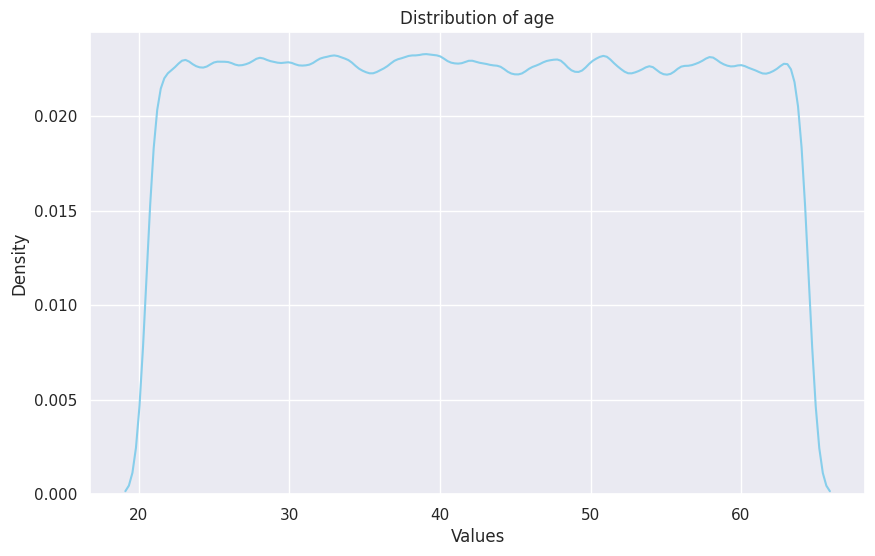

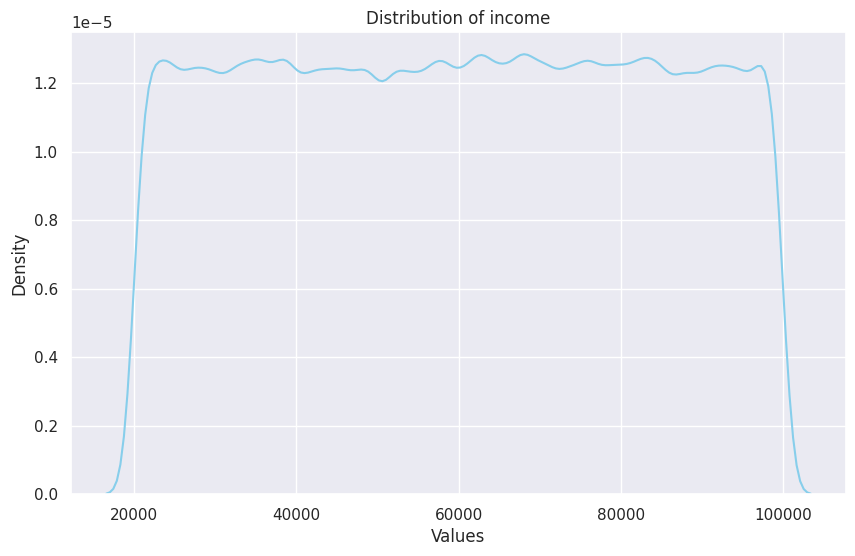

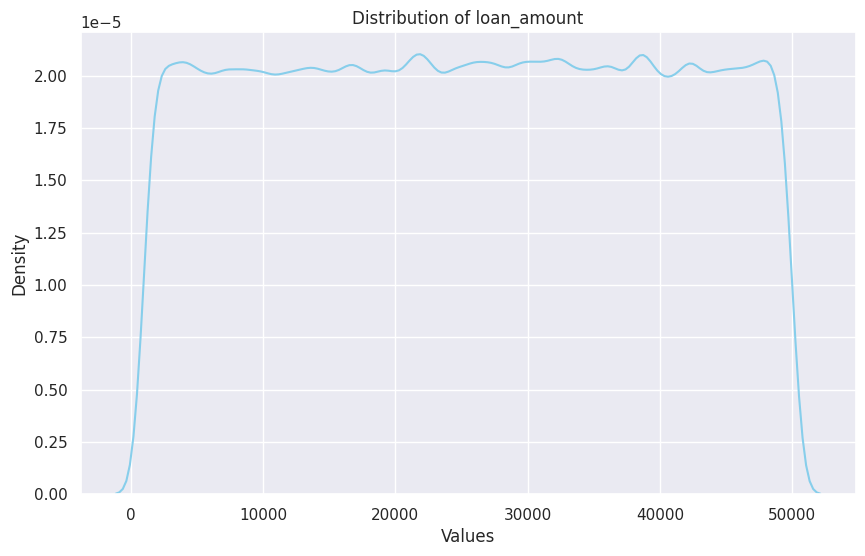

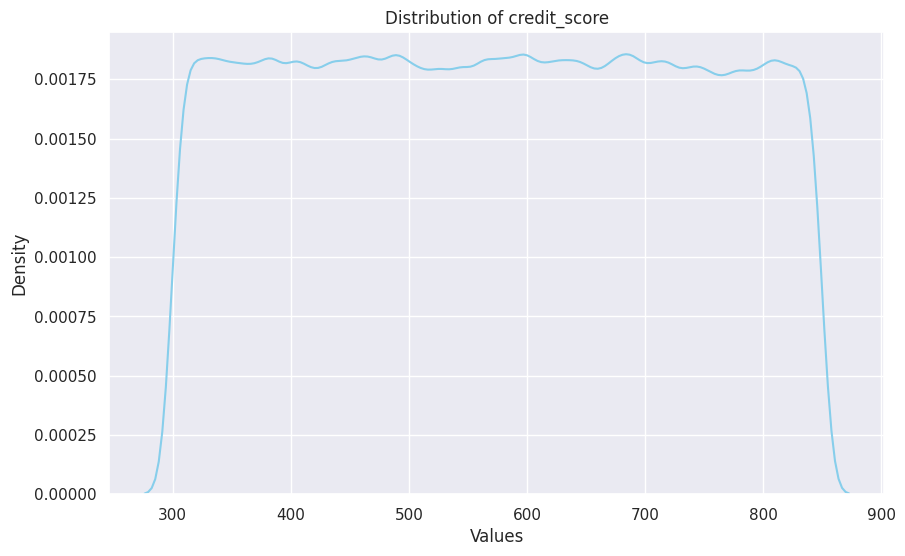

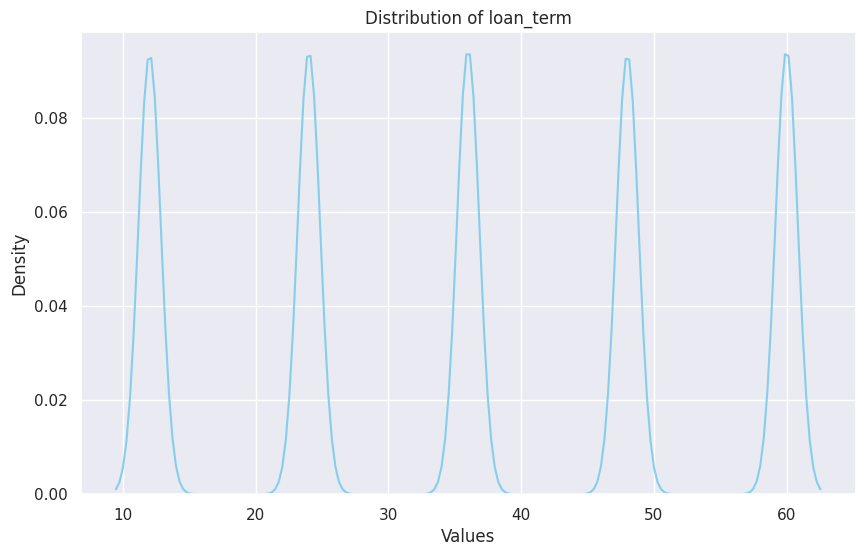

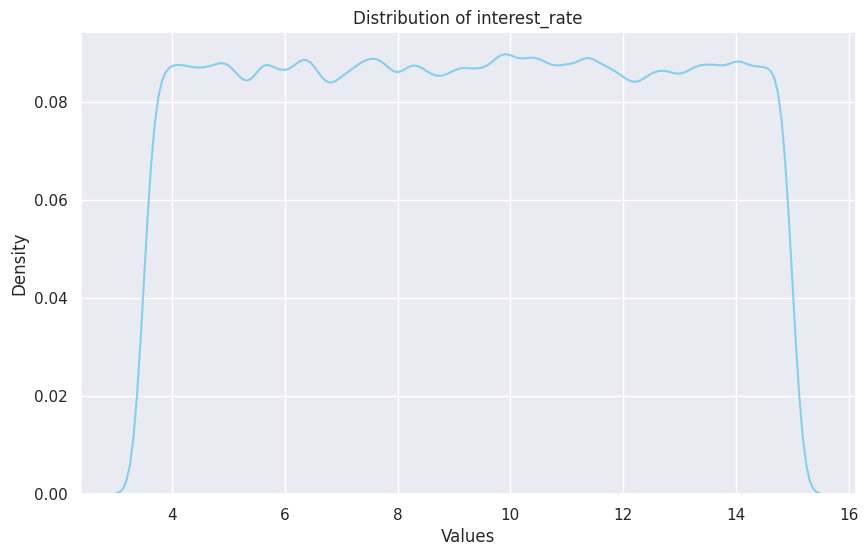

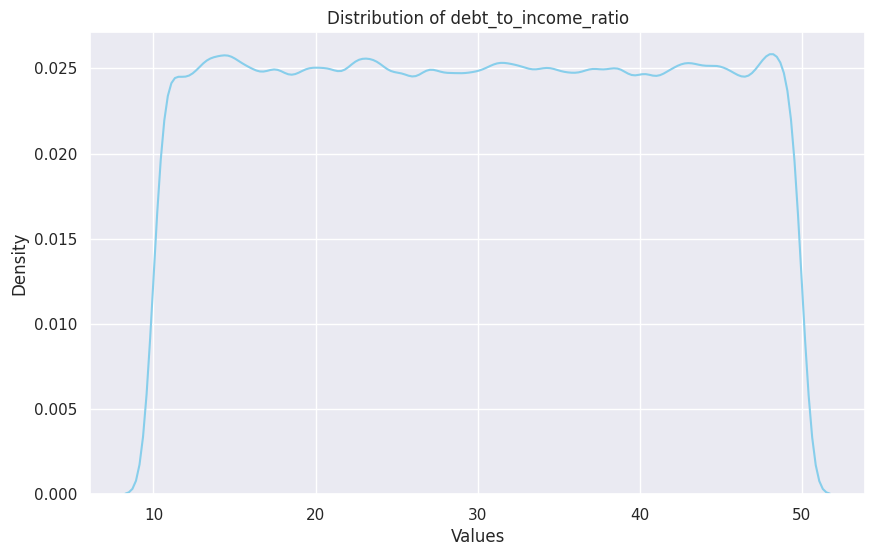

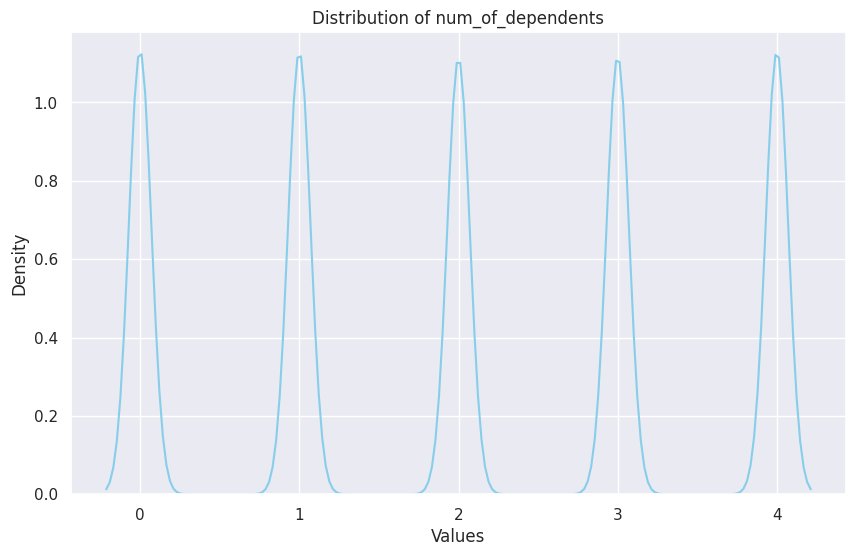

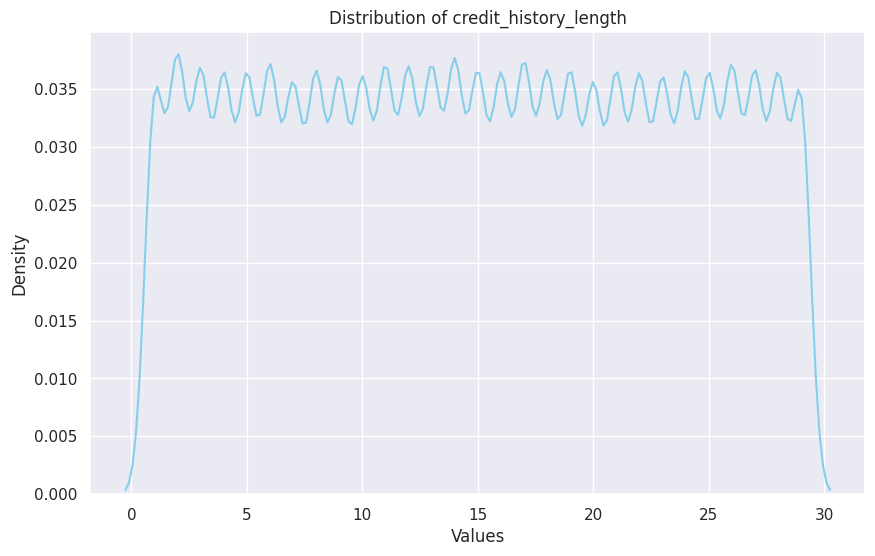

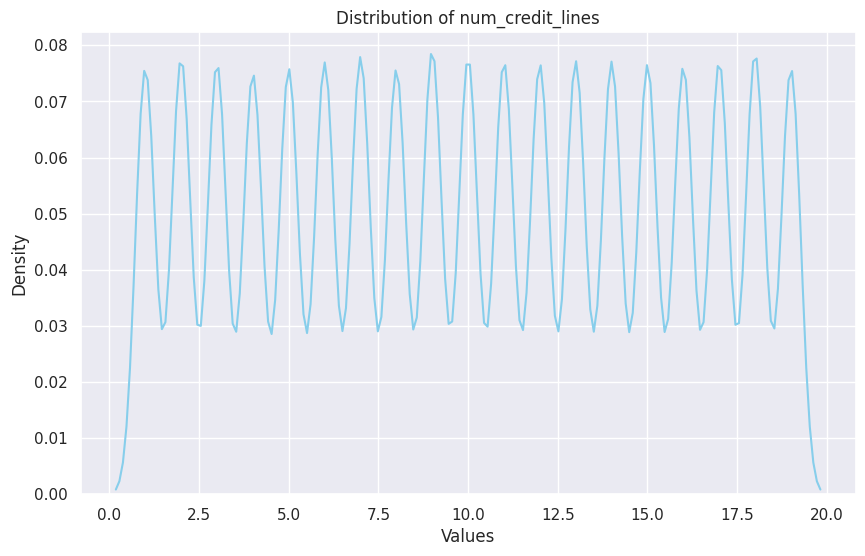

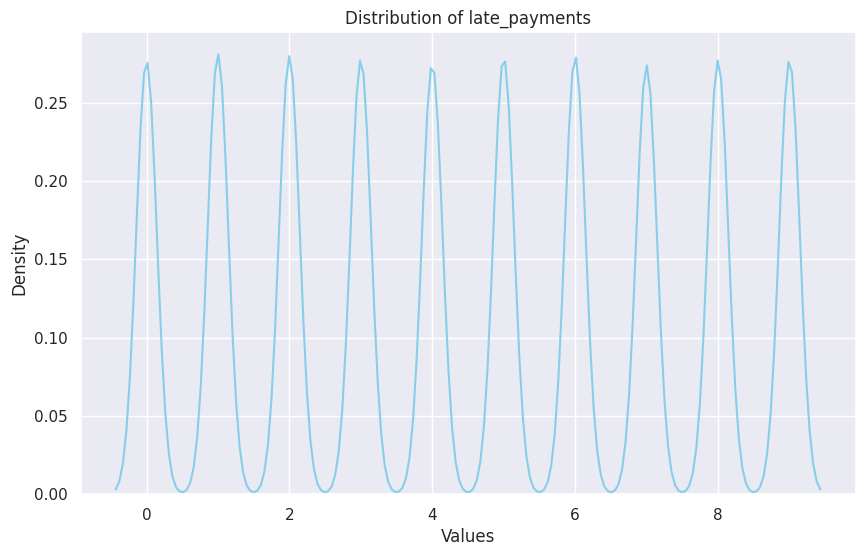

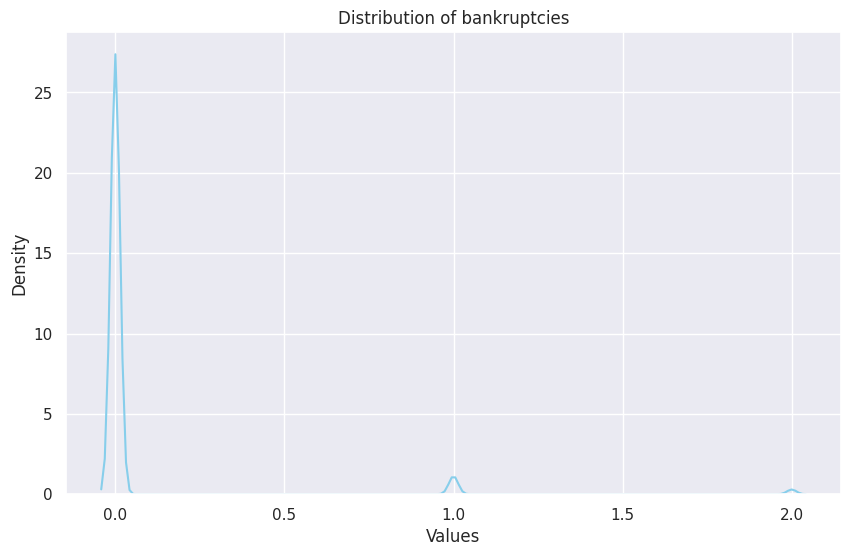

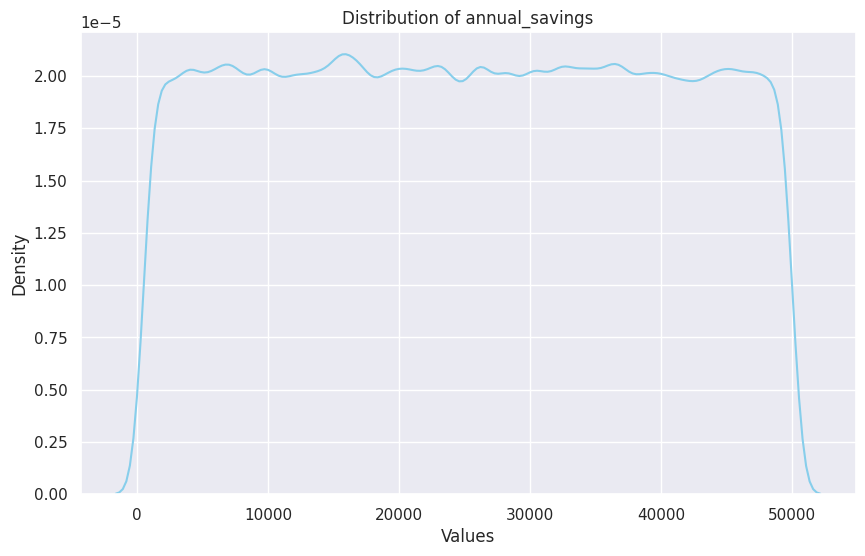

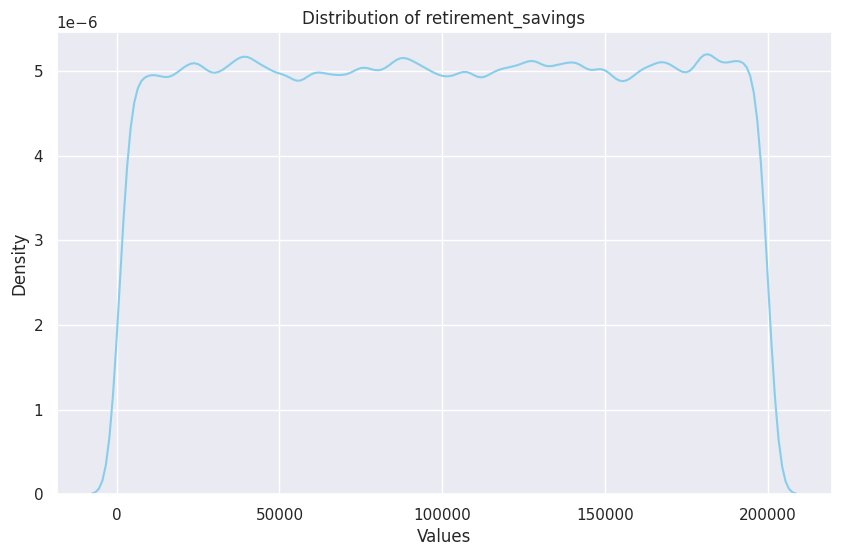

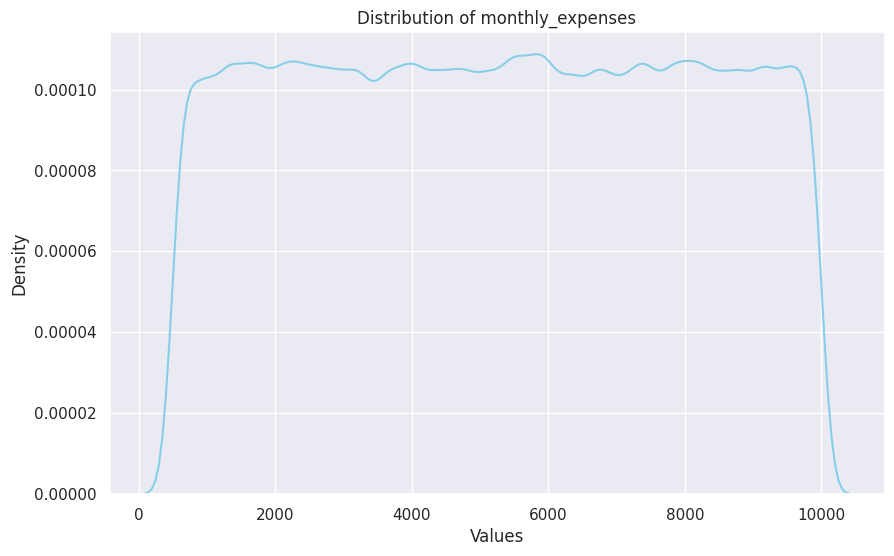

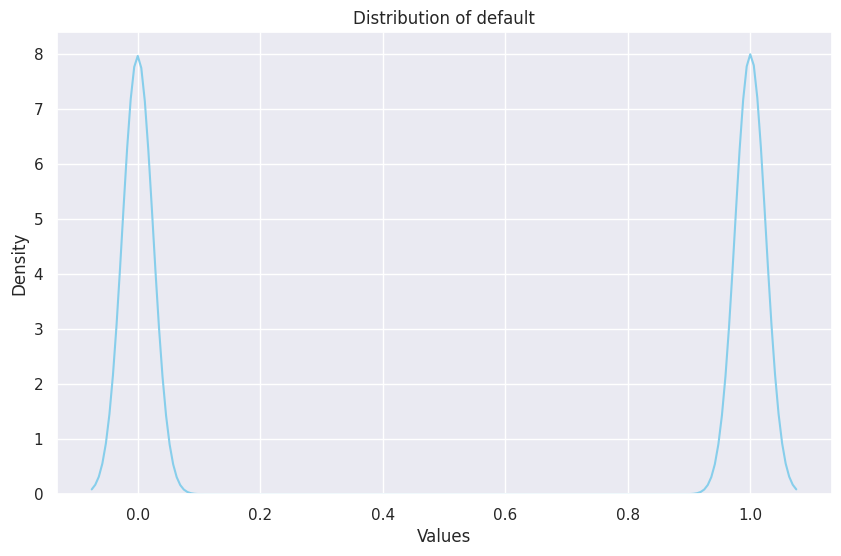

In [9]:

# Data distribution of nummerical features
sns.set(style='darkgrid')

for feature in numerical_features:
  # Create density plot
  plt.figure(figsize=(10, 6))
  plot_data = pd.DataFrame({'Values': ccfd_copy1[feature]})
  sns.kdeplot(
    data=plot_data,
    x='Values',        # The name of the variable to be plotted on the x-axis
    bw_adjust=0.5,     # Adjusts the bandwidth of the kernel density estimate
    color='skyblue'    # Color of the density plot
    )
  # Add title and labels
  plt.title(f'Distribution of {feature}')
  plt.xlabel('Values')
  plt.ylabel('Density')
  plt.show()

default
1    50094
0    49906
Name: count, dtype: int64


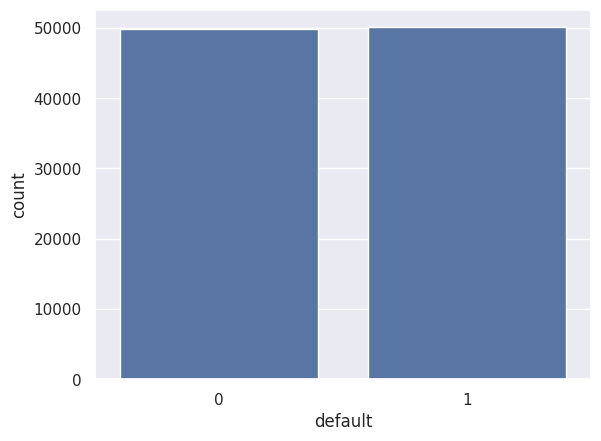

In [10]:
#distribution of target variable default
print(ccfd_copy1['default'].value_counts())
sns.countplot(x='default',data=ccfd_copy1)
plt.show()

#The target variable is equally distributed

In [11]:
ccfd_copy2 = ccfd_copy1.copy()
ccfd_copy2.head()

,age,income,loan_amount,credit_score,employment_status,default,loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009


In [12]:
#Encoding categorical features. The drop_first param is not set. Each categorical feature is analyzed and
# then the suitable encoded column us dropped. This is done to avoid high correlation between independent variables
ccfd_encoded = pd.get_dummies(ccfd_copy2,columns=categorical_features)
print(ccfd_encoded.head())


   age  income  loan_amount  credit_score  default  loan_term  interest_rate  \
0   38   71440        27069           689        1         36       9.937874   
1   36   90200        14895           578        0         48      13.624882   
2   47   85896         2613           352        1         12       6.676366   
3   38   20121         3163           622        0         48      12.833366   
4   44   77529        37731           615        0         12       4.111636   

   debt_to_income_ratio  num_of_dependents  credit_history_length  ...  \
0             31.046101                  0                      7  ...   
1             21.845252                  0                     11  ...   
2             12.562405                  1                     24  ...   
3             17.144545                  1                     12  ...   
4             35.892430                  3                     27  ...   

   home_ownership_mortgage  home_ownership_own  home_ownership_rent  \
0  

In [13]:
ccfd_encoded.drop(['marital_status_single'],axis=1,inplace=True)
ccfd_encoded.drop(['employment_status_unemployed'],axis=1,inplace=True)
ccfd_encoded.drop(['home_ownership_rent'],axis=1,inplace=True)
ccfd_encoded.drop(['education_level_high_school'],axis=1,inplace=True)
boolean_columns = [col for col in ccfd_encoded.columns if ccfd_encoded[col].dtype == bool]
ccfd_encoded[boolean_columns] = ccfd_encoded[boolean_columns].astype(int)
print(ccfd_encoded.head())

   age  income  loan_amount  credit_score  default  loan_term  interest_rate  \
0   38   71440        27069           689        1         36       9.937874   
1   36   90200        14895           578        0         48      13.624882   
2   47   85896         2613           352        1         12       6.676366   
3   38   20121         3163           622        0         48      12.833366   
4   44   77529        37731           615        0         12       4.111636   

   debt_to_income_ratio  num_of_dependents  credit_history_length  ...  \
0             31.046101                  0                      7  ...   
1             21.845252                  0                     11  ...   
2             12.562405                  1                     24  ...   
3             17.144545                  1                     12  ...   
4             35.892430                  3                     27  ...   

   monthly_expenses  employment_status_employed  \
0              6037    

###Task 2: Analyzing correlation between variables

Correlation matrix is : 


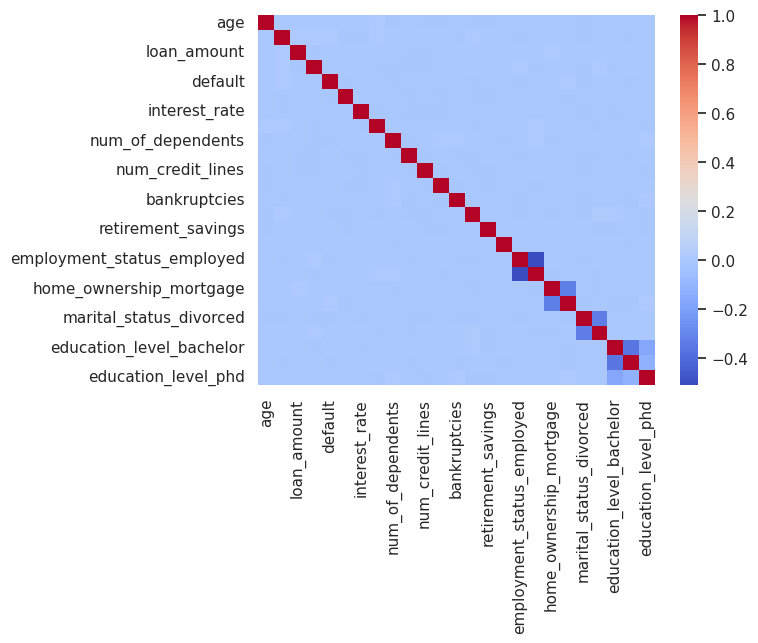

In [14]:

matrix = ccfd_encoded.corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap='coolwarm')
plt.show()

In [15]:
print("The correlation between features and target variable is: ")
print(ccfd_encoded.corr()['default'])



The correlation between features and target variable is: 
age                                0.001084
income                             0.004136
loan_amount                        0.001014
credit_score                      -0.001284
default                            1.000000
loan_term                         -0.008484
interest_rate                      0.004053
debt_to_income_ratio              -0.000637
num_of_dependents                 -0.004194
credit_history_length              0.002197
num_credit_lines                  -0.001097
late_payments                     -0.000559
bankruptcies                       0.002483
annual_savings                    -0.004380
retirement_savings                 0.001988
monthly_expenses                  -0.000060
employment_status_employed        -0.004250
employment_status_self-employed    0.002265
home_ownership_mortgage            0.003171
home_ownership_own                 0.004451
marital_status_divorced           -0.003084
marital_status_mar

###Task 3: Comparing default and non default groups accross income, loan amount and credit_score

<Figure size 3000x1800 with 0 Axes>

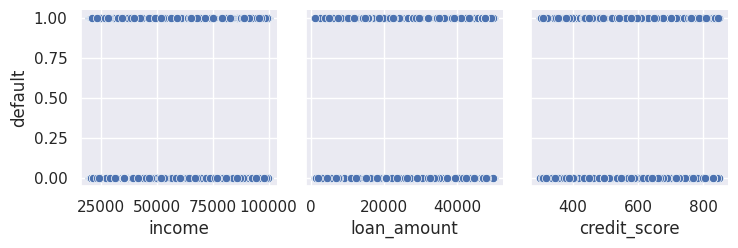

In [16]:

plt.figure(figsize=(30, 18))
sns.pairplot(ccfd_encoded,x_vars=['income','loan_amount','credit_score'],y_vars=['default'])
plt.show()
#There seems to be no differences between income and loan amount between
# defaulters and non defaulters. This is evident from the correlation matrix as well




###Task 4: The outliers are not seen in key features. This is evident from the box plot seen above

##Questions
### 1)Which features show a strong correlation with default?
### Answer : By correlation matrix, no feature shows strong correlation with default
### 2)Are there significant differences in income or loan amount between defaulters and non-defaulters?
### Answer : NO. This can be seen in the above plot
### 3)Do credit scores impact the likelihood of default?
### Answer : NO. This can be seen from the correlation matrix.

#Data Preprocessing

## Below tasks are covered

###Task1 :Handle missing values (imputation with mean/median/mode).- There are no missing values in dataset

###Task2 : Convert categorical variables into numerical form (e.g., one-hot encoding). - This is done in previous step

###Task3: Normalize numerical features (e.g., standardization or MinMax scaling).

###Task4 : Split the dataset into training (80%) and testing (20%) sets.



In [17]:
#taking a copy of dataset
ccfd_encoded_copy = ccfd_encoded.copy()

#splitting dataset
x = ccfd_encoded_copy.drop('default',axis=1)
y = ccfd_encoded_copy['default']
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import time
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
#Normalizing  features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mmScaler = MinMaxScaler()
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

#Continuous numerical data is scaled using Standard scaling. The discrete numerical features are scaled using MinMax scaling

for feature in true_numeric_features:
  x_train_scaled[feature] = scaler.fit_transform(x_train_scaled[[feature]])
  x_test_scaled[feature] = scaler.transform(x_test_scaled[[feature]])

for feature in numeric_to_encode:
  x_train_scaled[feature] = mmScaler.fit_transform(x_train_scaled[[feature]])
  x_test_scaled[feature] = mmScaler.fit_transform(x_test_scaled[[feature]])

print("the shapes of train and test sets are: ")
print(x_train_scaled.shape,x_test_scaled.shape)

print("the shapes of target variables are: ")
print(y_train.shape,y_test.shape)

print("The training data",x_train_scaled.head())
print("The testing data",x_test_scaled.head())
print("The target variables",y_train.head())
print("The target variables",y_test.head())


the shapes of train and test sets are: 
(80000, 24) (20000, 24)
the shapes of target variables are: 
(80000,) (20000,)
The training data             age    income  loan_amount  credit_score  loan_term  \
5573  -1.378852 -0.532251    -1.554763     -0.243329   1.412232   
58470  1.538343 -1.490886     0.273606      1.656020  -0.707931   
67283  0.276854 -0.206444     1.240369      1.403615   1.412232   
55539  1.380657  0.207838     1.152739     -0.628246  -1.414652   
26575  0.671069  1.245598    -1.270459     -0.565145   0.705511   

       interest_rate  debt_to_income_ratio  num_of_dependents  \
5573       -1.506800             -1.351055               1.00   
58470      -0.757775             -0.486191               0.50   
67283       1.608076              0.003371               0.00   
55539       0.612130              0.470628               0.00   
26575      -1.721486             -0.485479               0.25   

       credit_history_length  num_credit_lines  ...  monthly_expenses

#3)Model Selection and Training

###Task1:Train a Logistic Regression model as a baseline.

In [18]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled,y_train)
y_pred = lr_model.predict(x_test_scaled)
y_train_pred = lr_model.predict(x_train_scaled)
print("The test accuracy of logistic regression model is: ",accuracy_score(y_test,y_pred))
print("The train accuracy of logistic regression model is: ",accuracy_score(y_train,y_train_pred))

The test accuracy of logistic regression model is:  0.49405
The train accuracy of logistic regression model is:  0.5057375


###Task2: Experiment with Decision Tree, Random Forest, and Gradient Boosting models.

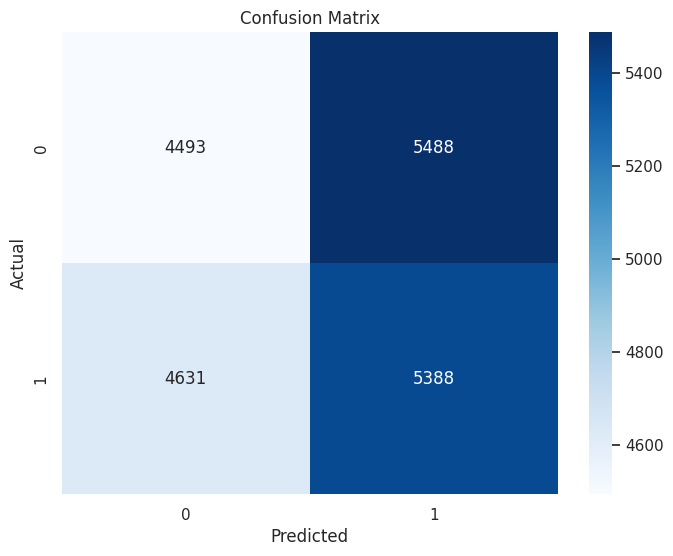

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.45      0.47      9981
           1       0.50      0.54      0.52     10019

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



In [21]:
# ROC Curve and AUC
y_prob = lr_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

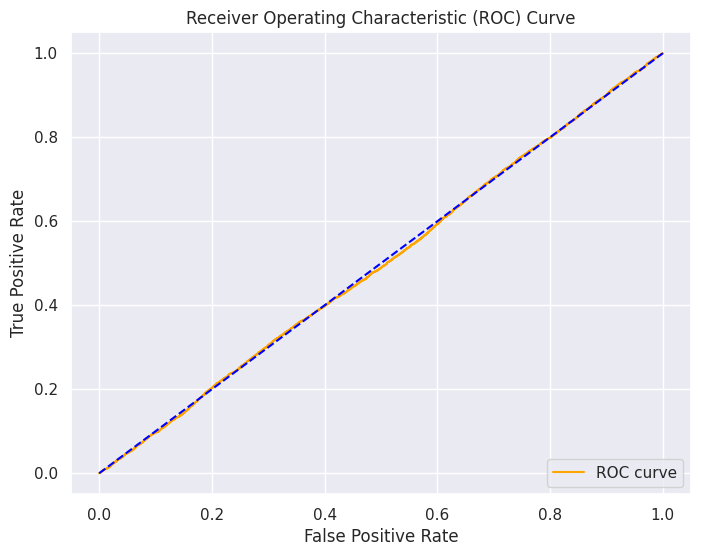

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
# AUC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

AUC Score: 0.4988897809921094


In [24]:
# Additional Classification Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Recall (Sensitivity)
recall = tp / (tp + fn)
print("Recall (Sensitivity):", recall)


# Precision
precision = tp / (tp + fp)
print("Precision:", precision)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)


Recall (Sensitivity): 0.5377782213793791
Precision: 0.49540272158881943
F1-score: 0.5157214644651831


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train_scaled,y_train)

model_dt_8_score_train = model_dt_8.score(x_train_scaled,y_train)

model_dt_8_score_test = model_dt_8.score(x_test_scaled,y_test)

y_pred = model_dt_8.predict(x_test_scaled)
y_train_pred = model_dt_8.predict(x_train_scaled)
print("The test accuracy of decision tree model is: ",accuracy_score(y_test,y_pred))
print("The train accuracy of decision tree model is: ",accuracy_score(y_train,y_train_pred))


print('Training Score',model_dt_8_score_train)

print('Testing Score',model_dt_8_score_test)

The test accuracy of decision tree model is:  0.50545
The train accuracy of decision tree model is:  0.5207125
Training Score 0.5207125
Testing Score 0.50545


In [ ]:
model_dt = DecisionTreeClassifier()
param_dist = {'max_depth': [2, 3, 4],
              'min_samples_leaf': [1,2],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_split': [2,3],
              'criterion': ['gini','entropy','log_loss']}

cv_rf = RandomizedSearchCV(model_dt,
                     param_distributions=param_dist,
                     cv=10,
                     scoring='accuracy',
                     n_jobs = 3)
cv_rf.fit(x_train_scaled, y_train)
print('Best Parameters using random search: \n', cv_rf.best_params_)
best_dt_model = cv_rf.best_estimator_
y_pred = best_dt_model.predict(x_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters using random search: 
 {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'log_loss'}
Best Model Accuracy: 0.50235


In [ ]:
# Model Evaluation
# Predictions
y_pred = best_dt_model.predict(x_test_scaled)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.50235


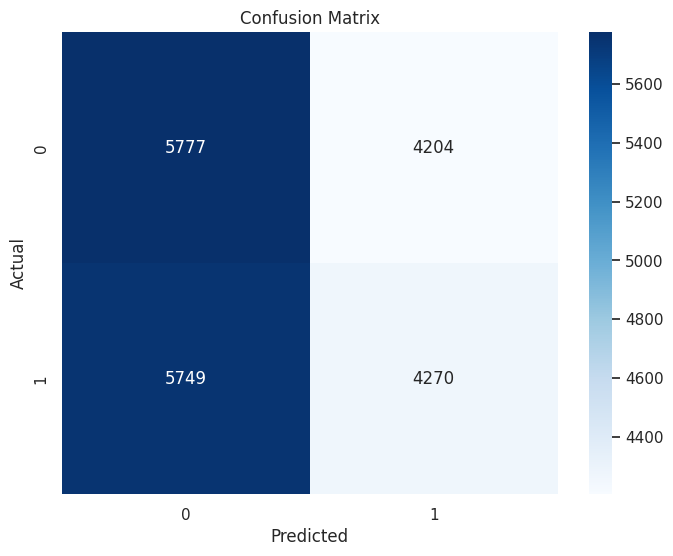

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      9981
           1       0.50      0.43      0.46     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
# ROC Curve and AUC
y_prob = best_dt_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

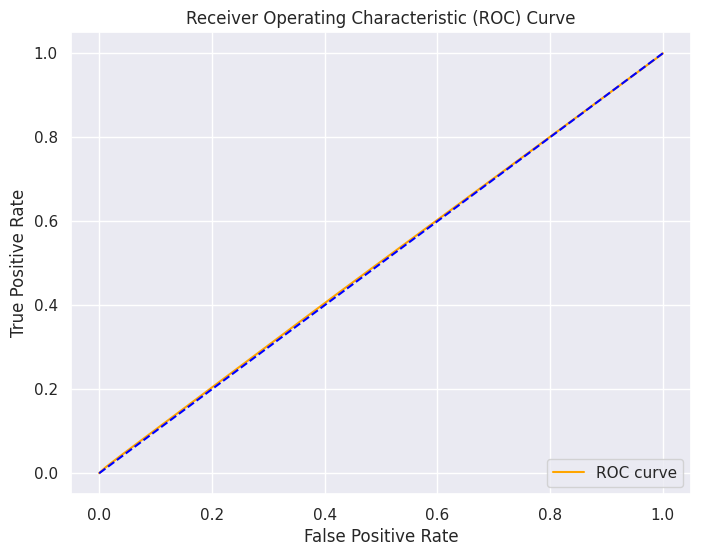

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# AUC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

AUC Score: 0.5030021458377465


In [ ]:
# Additional Classification Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Recall (Sensitivity)
recall = tp / (tp + fn)
print("Recall (Sensitivity):", recall)


# Precision
precision = tp / (tp + fp)
print("Precision:", precision)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)


Recall (Sensitivity): 0.42619023854676114
Precision: 0.5038942648100071
F1-score: 0.46179635537771047


In [25]:
from ast import mod
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train_scaled,y_train)
model_rf_score_train = model_rf.score(x_train_scaled,y_train)
model_rf_score_test = model_rf.score(x_test_scaled,y_test)
print('Training Score',model_rf_score_train)
print('Testing Score',model_rf_score_test)

Training Score 1.0
Testing Score 0.50045


In [26]:

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = RandomizedSearchCV(model_rf,
                     param_distributions=param_dist,
                     cv=10,
                     scoring='accuracy',
                     n_jobs = 3)

cv_rf.fit(x_train_scaled, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'max_features': 'log2', 'max_depth': 2, 'criterion': 'gini', 'bootstrap': False}


In [27]:
best_params = cv_rf.best_params_
best_rf_model = cv_rf.best_estimator_

In [ ]:
best_rf_model.set_params(oob_score=True,bootstrap=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    best_rf_model.set_params(n_estimators=i)
    best_rf_model.fit(x_train_scaled, y_train )

    oob_error = 1 - best_rf_model.oob_score_
    error_rate[i] = oob_error

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too fe

In [ ]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

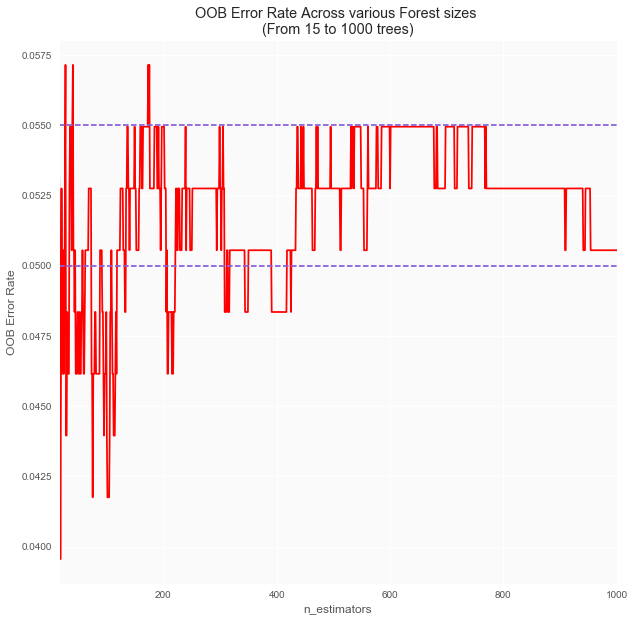

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [28]:
best_rf_model.set_params(n_estimators=400,bootstrap=False)
best_rf_model.fit(x_train_scaled,y_train)
best_rf_model_score_train = best_rf_model.score(x_train_scaled,y_train)
best_rf_model_score_test = best_rf_model.score(x_test_scaled,y_test)
print('Training Score',best_rf_model_score_train)
print('Testing Score',best_rf_model_score_test)

Training Score 0.511725
Testing Score 0.49755


In [29]:
# Model Evaluation
# Predictions
y_pred = best_rf_model.predict(x_test_scaled)

In [30]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49755


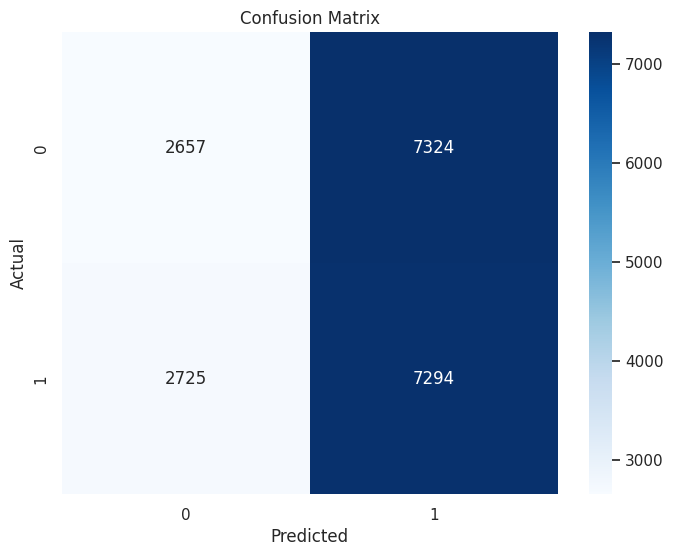

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.27      0.35      9981
           1       0.50      0.73      0.59     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



In [33]:
# ROC Curve and AUC
y_prob = best_rf_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

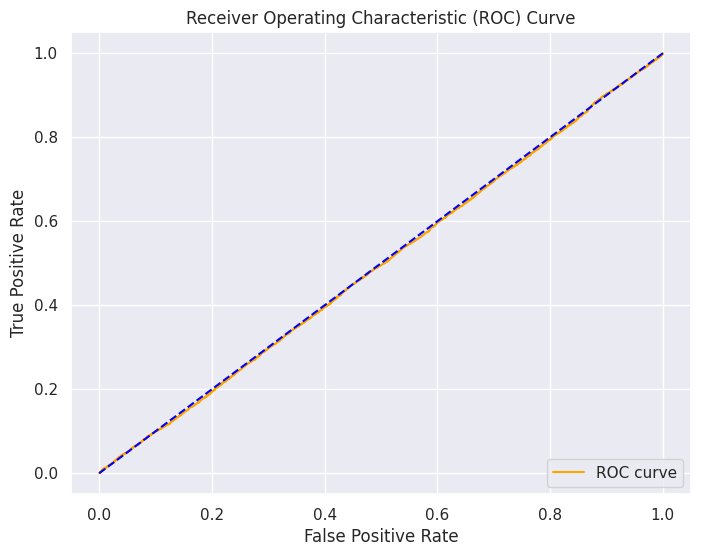

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# AUC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

AUC Score: 0.4965736326308138


In [36]:
# Additional Classification Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Recall (Sensitivity)
recall = tp / (tp + fn)
print("Recall (Sensitivity):", recall)

# Precision
precision = tp / (tp + fp)
print("Precision:", precision)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)


Recall (Sensitivity): 0.728016768140533
Precision: 0.498973867834177
F1-score: 0.5921175467792344


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train_scaled,y_train)
model_gb_score_train = model_gb.score(x_train_scaled,y_train)
model_gb_score_test = model_gb.score(x_test_scaled,y_test)
print('Training Score',model_gb_score_train)
print('Testing Score',model_gb_score_test)

Training Score 0.5433875
Testing Score 0.49875


In [38]:
model_gb_2 = GradientBoostingClassifier()
param_dist = {'n_estimators': [100, 200, 300, 400],
              'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'max_depth': [2, 3, 4],
              'loss': ['logloss','exponential'],
              'min_samples_leaf': [1,2],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_split': [2,3],
              'criterion': ['friedman_mse', 'squared_error']}

cv_rf = RandomizedSearchCV(model_gb_2,
                     param_distributions=param_dist,
                     cv=10,
                     scoring='accuracy',
                     n_jobs = 3)

cv_rf.fit(x_train_scaled, y_train)
best_params = cv_rf.best_params_
best_model = cv_rf.best_estimator_

y_pred = best_model.predict(x_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}
Best Model Accuracy: 0.49665


In [39]:
# Model Evaluation
# Predictions
y_pred = best_model.predict(x_test_scaled)

In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49665


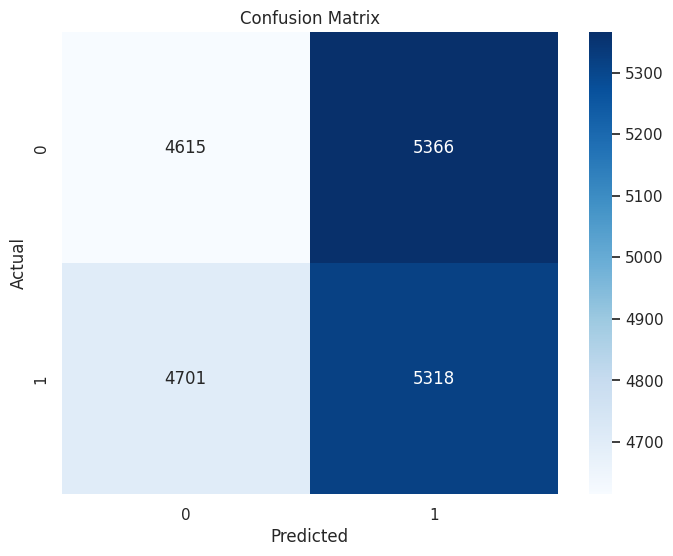

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48      9981
           1       0.50      0.53      0.51     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [43]:
# ROC Curve and AUC
y_prob = best_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

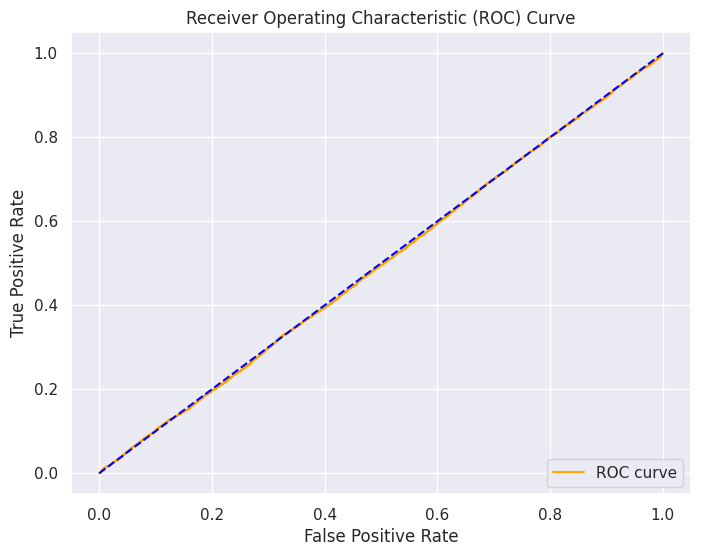

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
# AUC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

AUC Score: 0.49736862050072


In [46]:
# Additional Classification Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Recall (Sensitivity)
recall = tp / (tp + fn)
print("Recall (Sensitivity):", recall)

# Precision
precision = tp / (tp + fp)
print("Precision:", precision)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)


Recall (Sensitivity): 0.5307914961573011
Precision: 0.4977536503182329
F1-score: 0.5137419697628363


###Task 3: Compare models based on accuracy, precision, recall, and F1-score.

### The accuracy, precision, recall and f1-score for all the models are almost same

##Questions
###1)What is the advantage of using a Logistic Regression model as a baseline?
###Answer: This gives a minimum accuracy to expect from the models.
###2)Which model performs best, and why?
###Answer : GradientBoostingClassifier model gives better performance. This is an ensemble model and hence prevents overfitting. With Hyperparameter tuning, the best possible model is obtained.
###3)What are the potential weaknesses of Decision Trees compared to Random Forest?
###Answer: Overfitting and lesser accuracy are the potential weaknesses of decision tree compared to random forest.

#5) Model Evaluation

##Tasks
###1. Compute evaluation metrics: Accuracy, Precision, Recall, F1-score.
###2. Generate a confusion matrix to analyze false positives and false negatives.
###3. Use ROC-AUC to measure overall model performance.

### All the above mentioned tasks are done for each of the models

##Questions
###1)Why is precision-recall more important than accuracy for this dataset?
### Answer: False positivity and False Negativity in predicting the defaulters is more important.  Precision is inversely proportional to false positivity. Recall is inversely proportional to false negativity. Classifying a person's record falsely as default and also classifying a person's record falsely as non_default both are a matter of concern. Hence precisio-recall are more important than accuracy in this dataset.

###2)How does the confusion matrix help in assessing model performance?
###Answer: Confusion matrix gives the count of True Positive, False Positive, True Negative and False Negative predictions of the model. With these counts one can find the precision, recall, F1-score and specificity.

###3)What does a high false negative rate indicate in credit risk prediction?
###Answer: High false negative rate in a model means, there is a high probability for a record to be incorrectly classified as non_default. The credit risk is incorrecly predicted as low.

#6) HyperParameter Tuning

##Tasks
###1. Optimize model hyperparameters using Grid Search or Random Search.
###2. Implement Cross-Validation to improve model reliability.
###3. Compare results before and after tuning.

### All the above tasks are performed for each model. The accuracy was better after tuning.
### In case of DecisionTreeClassifier model, high overfitting is addressed by hyperparameter tuning. In other models, there was no significant difference

##Questions
###1)What are the key hyperparameters to tune in a Random Forest model?
###Answer: n_estimators, max_depth,max_features,min_samples_split,
###2) Why is cross-validation important?
###Answer: To improve model performance, avoid overfitting, required for hyper parameter tuning
###3) Did tuning significantly improve model performance?
### Answer: For this dataset, tuning helped in reducing the overfitting problem. But there was no significant difference in accuracy of the models.

#Conclusion
### Summarize the most important findings from your analysis.
###Answer : 1)In the given dataset, none of the independent features are correlated with each other and also with the dependent feature. This seems to be the reason for low accuracy from each ML model.
###2) Hyperparameter tuning improved performance slightly and helped reduce the overfitting problem.

### Identify the best model for predicting loan defaults.
### Answer : RandomForestClassifier is best for predicting loan defaults. This is due to hight precision and recall values.

### Discuss the real-world applications of your project.
### Answer: This credit_card_fraud_detection project is helpful in finance sector in classifying the people's record as defaulters and non_defaulters. This helps in decision making easier.
### Loan period, interest rate etc. can be revised and reviewed by taking the risk prediction into account